<a href="https://colab.research.google.com/github/valdolab/DS_mAIstros/blob/main/Week5/Note_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural language processing
## Mathematical representations

preprocessing -> encoding -> classify

BoW, TF-IDF

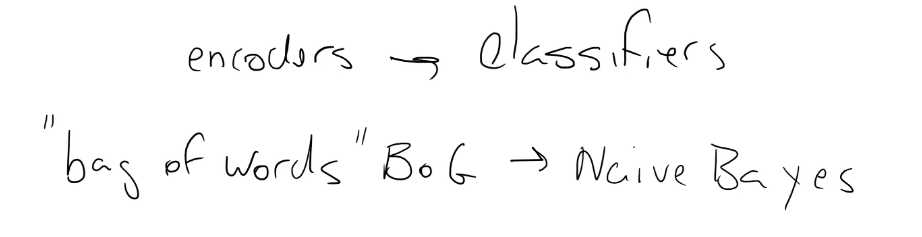

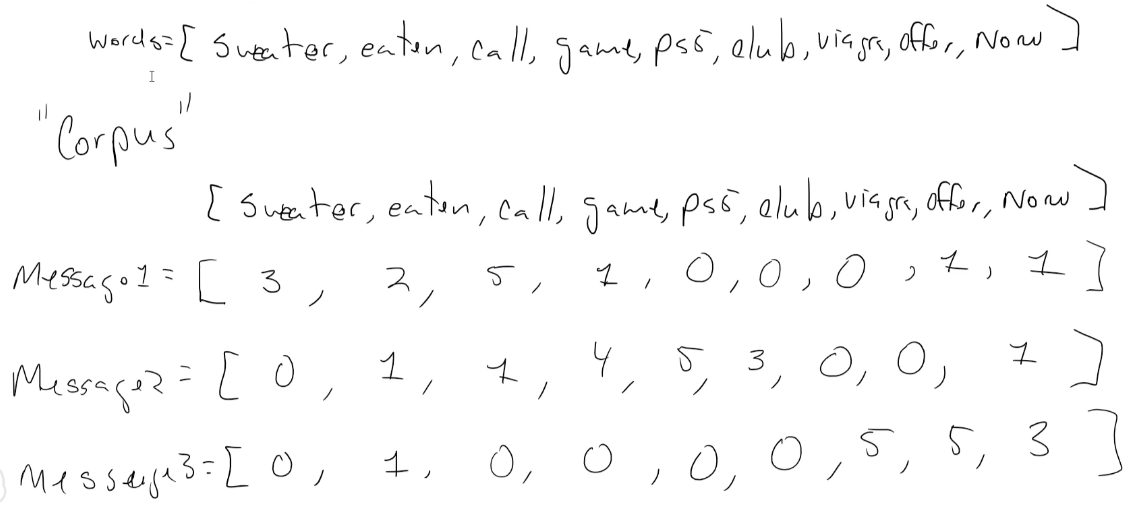

pre-processing:
1. De-noise
2. remove stop-words
3. lemmatitation, steamming
4. tokenize


Increase of complexity:
1. BoW
2. TF-IDF - logistic regression
3. Doc2vec - Random forest
4. GloveEnbedding - XGBoost

### Attention mechanize - context
LSTM with attention

This a encoder and decoder:
it's going a vector to be a vector that Regresents gografy location in a vector space.


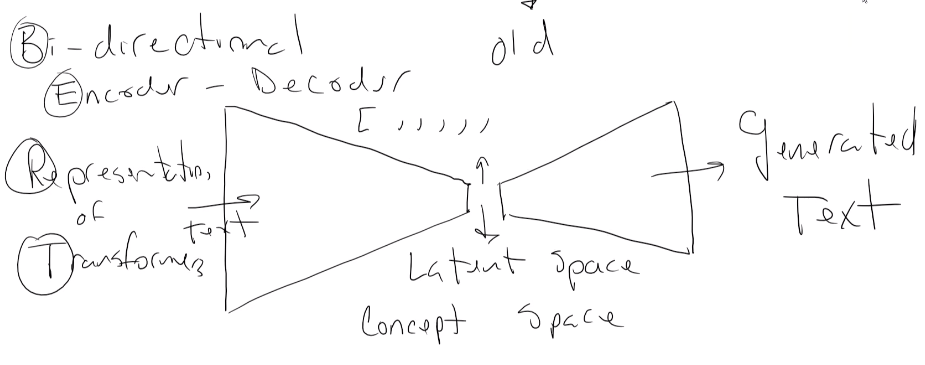

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EIT_W5/UglyWords1 - Sheet1 (1).csv')
data

,Unnamed: 0,Unnamed: 1,string
0,NaN,NaN,*screams in 25 different languages*
1,NaN,NaN,Families to sue over Legionnaires: More than 4...
2,NaN,NaN,Pandemonium In Aba As Woman Delivers Baby With...
3,NaN,NaN,My emotions are a train wreck. My body is a tr...
4,NaN,NaN,Alton brown just did a livestream and he burne...
...,...,...,...
1859,NaN,NaN,@Trollkrattos Juan Carlos Salvador The Secret ...
1860,NaN,NaN,@devon_breneman hopefully it doesn't electrocu...
1861,NaN,NaN,Businesses are deluged with invokces. Make you...
1862,NaN,NaN,#BREAKING411 4 police officers arrested for ab...


In [ ]:
#data["id"] = data.index + 1

,Unnamed: 0,Unnamed: 1
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
1859,NaN,NaN
1860,NaN,NaN
1861,NaN,NaN
1862,NaN,NaN


In [ ]:
#data = pd.concat([data["id"],data["string"]], axis = 1)
data = data.drop(data.iloc[:,0:2], axis=1)

In [ ]:
data
#mydata = data[1243:]

,string
0,*screams in 25 different languages*
1,Families to sue over Legionnaires: More than 4...
2,Pandemonium In Aba As Woman Delivers Baby With...
3,My emotions are a train wreck. My body is a tr...
4,Alton brown just did a livestream and he burne...
...,...
1859,@Trollkrattos Juan Carlos Salvador The Secret ...
1860,@devon_breneman hopefully it doesn't electrocu...
1861,Businesses are deluged with invokces. Make you...
1862,#BREAKING411 4 police officers arrested for ab...


In [ ]:
def Text_Pre_Proc(text, steps=6):
  out_report=[]
  pun = ['@','#','%','&','(',')','*','+','-','/',':',';','<','=','>','[',']','^','_','`','{','|','}','~']
  text_out = re.sub(r'https?:\/\/.*[\r\n]*','',text)
  out_report.append("removed links")
  if steps >1:
    text_out="".join([char for char in text_out if char not in pun])
    out_report.append("removed punct")
  if steps >3:
    text_out=text_out.lower()
    out_report.append("lower case")

  text_out = [word for word in text_out if word not in ['']]

  return("".join(text_out))

In [ ]:
Text_Pre_Proc("Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires' disea... http://t.co/ZA4AXFJSVB")

"families to sue over legionnaires more than 40 families affected by the fatal outbreak of legionnaires' disea... "

In [ ]:
list_data = list(data['string'])
new_list_data = []

for word in list_data:
  new_list_data.append(Text_Pre_Proc(word))

cleaned_data = pd.DataFrame(new_list_data)
cleaned_data

,0
0,screams in 25 different languages
1,families to sue over legionnaires more than 40...
2,pandemonium in aba as woman delivers baby with...
3,my emotions are a train wreck. my body is a tr...
4,alton brown just did a livestream and he burne...
...,...
1859,trollkrattos juan carlos salvador the secret t...
1860,devonbreneman hopefully it doesn't electrocute...
1861,businesses are deluged with invokces. make you...
1862,breaking411 4 police officers arrested for abu...


In [ ]:
cleaned_data.to_csv('/content/drive/MyDrive/Colab Notebooks/EIT_W5/cleaned_data_text_nlp.csv', header=False)

## Transfer learning

Training a model

label data -> model -> W = Matrix of values -> save the matrix, pandas pd.to_csv

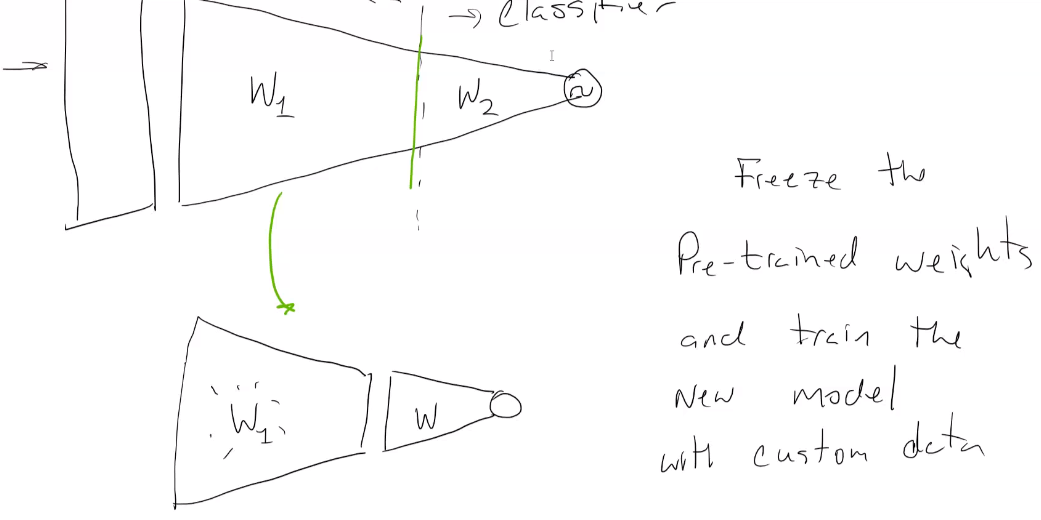

To big frameworks to do transfer learning(Deep learning frameworks):

**Meta:**
*   pytorch
*   torch

**Google:**

*   Tensorflow
*   Tensorhub - source of pre trained models


Repository of models: Hugging Face







Example to pre-process NLP \
los mismos pasos que en la clase de gregori NLP

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import string
import re
import nltk

In [ ]:
#text preprocessing
text = "If you were the NWS wth a rotating storm w/ a report of a 'HUGE' / 'MASSIVE' / 'VIOLENT' tornado what would you do? https://t.co/J3dI85IST5"

### De-Noise

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
text_dn = re.sub(r'https?:\/\/.*[\r\n]*','',text)

In [ ]:
text_dn

"If you were the NWS wth a rotating storm w/ a report of a 'HUGE' / 'MASSIVE' / 'VIOLENT' tornado what would you do? "

In [ ]:
text_dn2 = "".join([char for char in text_dn if char not in string.punctuation])

In [ ]:
text_dn2

'If you were the NWS wth a rotating storm w a report of a HUGE  MASSIVE  VIOLENT tornado what would you do '

### Lower case

In [ ]:
text_lc = text_dn2.lower()
text_lc

'if you were the nws wth a rotating storm w a report of a huge  massive  violent tornado what would you do '

### Remove stop words

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
split_words = text_lc.split(" ")

In [ ]:
print(split_words)

['if', 'you', 'were', 'the', 'nws', 'wth', 'a', 'rotating', 'storm', 'w', 'a', 'report', 'of', 'a', 'huge', '', 'massive', '', 'violent', 'tornado', 'what', 'would', 'you', 'do', '']


In [ ]:
filtered_words = [word for word in split_words if word not in stop_words and word not in ['']]

In [ ]:
filtered_words

['nws',
 'wth',
 'rotating',
 'storm',
 'w',
 'report',
 'huge',
 'massive',
 'violent',
 'tornado',
 'would']

In [ ]:
filtered_text = " ".join(filtered_words)
filtered_text

'nws wth rotating storm w report huge massive violent tornado would'

In [ ]:
from nltk.stem.porter import PorterStemmer

In [ ]:
porter = PorterStemmer()

In [ ]:
stemmed_words = [porter.stem(word) for word in filtered_words]

In [ ]:
#lo de arriba de list compresention hace lo siguiente:
stemmed_words = []
for word in filtered_words:
  stemmed_words.append(porter.stem(word))

### Lemmatization

In [ ]:
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
lemmatized_words

['nw',
 'wth',
 'rotating',
 'storm',
 'w',
 'report',
 'huge',
 'massive',
 'violent',
 'tornado',
 'would']

In [ ]:
porter.stem("caring")

'care'

In [ ]:
lemmatizer.lemmatize("better",pos="a")

'good'

In [ ]:
words = ["program","programming","programer"]

In [ ]:
[porter.stem(word) for word in words]

['program', 'program', 'program']

In [ ]:
[lemmatizer.lemmatize(word) for word in words]

['program', 'programming', 'programer']

### Function to do the pre processing

In [ ]:
def Text_Pre_Proc(text, steps=6):
  out_report=[]
  text_out = re.sub(r'https?:\/\/.*[\r\n]*','',text)
  out_report.append("removed links")
  if steps >1:
    text_out="".join([char for char in text_out if char not in string.punctuation])
    out_report.append("removed punct")
  if steps >3:
    text_out=text_out.lower()
    out_report.append("lower case")

  if steps >4:
    stop_words = stopwords.words('english')
    text_out=text_out.split(" ")
    text_out = [word for word in text_out if word not in stop_words and word not in ['']]
    out_report.append("removed stop words")

  if steps>5:
    text_out=[porter.stem(word)
 for word in text_out]
    out_report.append("stemmed")

  return(text_out,out_report)

In [ ]:
text_out, out_report = Text_Pre_Proc(text)

In [ ]:
" ".join(text_out)

'nw wth rotat storm w report huge massiv violent tornado would'

### Basic fault tolerance in Python

In [ ]:
def multiply_words(word_a,word_b):

  try:
    out = word_a*word_b
  except:
    out = word_a
    print("I survived ")

  return out

In [ ]:
multiply_words("apple",5)

'appleappleappleappleapple'

In [ ]:
multiply_words("orange","apple")

I survived 


'orange'

## sentimen analysis with basic swivel embeddings
Using tensorflow

In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
import tensorflow_datasets as tfds

In [ ]:
train_data, validation_data, test_data = tfds.load(
    name = "imdb_reviews",
    split = ('train[:60%]','train[60%:]','test'),
    as_supervised = True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete1QKA00/imdb_reviews-train.tfrecord…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete1QKA00/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete1QKA00/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))

In [ ]:
train_examples_batch.shape

TensorShape([10])

In [ ]:
train_examples_batch[:1][0]

<tf.Tensor: shape=(), dtype=string, numpy=b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.">

In [ ]:
train_examples_batch[:1][0].numpy().decode("utf-8")

"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."

In [ ]:
train_labels_batch[0]

<tf.Tensor: shape=(), dtype=int64, numpy=0>

In [ ]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"

In [ ]:
hub_layer = hub.KerasLayer(embedding,input_shape=[],dtype=tf.string,trainable = True)

In [ ]:
hub_layer(train_examples_batch[:1])
#this are the weiths of the hub layer, estos son los pesos de la capa hub de la red

<tf.Tensor: shape=(1, 20), dtype=float32, numpy=
array([[ 1.765786  , -3.882232  ,  3.9134233 , -1.5557289 , -3.3362343 ,
        -1.7357955 , -1.9954445 ,  1.2989551 ,  5.081598  , -1.1041286 ,
        -2.0503852 , -0.72675157, -0.65675956,  0.24436149, -3.7208383 ,
         2.0954835 ,  2.2969332 , -2.0689783 , -2.9489717 , -1.1315987 ]],
      dtype=float32)>

In [ ]:
#creamos la red
model = keras.Sequential()

In [ ]:
#agregamos las capaz a la red
#ponemos en la red las capaz que usamos en el transfer learning (embedding), la primera capa es el embedding del texto
#transformamos el texto a una capa de la red
#hub layer y luego al final las nuevas capaz que serviran para terminar de entrenar la red a nuestro problema
model.add(hub_layer)
model.add(keras.layers.Dense(18,activation='relu'))
model.add(keras.layers.Dense(12,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(6,activation='relu'))
#binary = sigmoid, multi class = softmax
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 20)                400020    
                                                                 
 dense (Dense)               (None, 18)                378       
                                                                 
 dense_1 (Dense)             (None, 12)                228       
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_2 (Dense)             (None, 6)                 78        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 400,711
Trainable params: 400,711
Non-tr

In [ ]:
model.compile(optimizer='Nadam',loss = keras.losses.BinaryCrossentropy(from_logits=True), metrics = ['accuracy'])

In [ ]:
history = model.fit(train_data.shuffle(1000).batch(512), epochs=40, validation_data = validation_data.batch(512), verbose = 2)

Epoch 1/40


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5676: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


30/30 - 6s - loss: 0.7064 - accuracy: 0.5457 - val_loss: 0.6704 - val_accuracy: 0.6322 - 6s/epoch - 196ms/step
Epoch 2/40
30/30 - 4s - loss: 0.6687 - accuracy: 0.6053 - val_loss: 0.6448 - val_accuracy: 0.6716 - 4s/epoch - 131ms/step
Epoch 3/40
30/30 - 3s - loss: 0.6368 - accuracy: 0.6468 - val_loss: 0.6005 - val_accuracy: 0.7046 - 3s/epoch - 97ms/step
Epoch 4/40
30/30 - 3s - loss: 0.5900 - accuracy: 0.7011 - val_loss: 0.5482 - val_accuracy: 0.7400 - 3s/epoch - 96ms/step
Epoch 5/40
30/30 - 4s - loss: 0.5384 - accuracy: 0.7432 - val_loss: 0.4957 - val_accuracy: 0.7749 - 4s/epoch - 120ms/step
Epoch 6/40
30/30 - 3s - loss: 0.4815 - accuracy: 0.7793 - val_loss: 0.4426 - val_accuracy: 0.8033 - 3s/epoch - 95ms/step
Epoch 7/40
30/30 - 3s - loss: 0.4229 - accuracy: 0.8183 - val_loss: 0.4028 - val_accuracy: 0.8224 - 3s/epoch - 95ms/step
Epoch 8/40
30/30 - 3s - loss: 0.3730 - accuracy: 0.8448 - val_loss: 0.3746 - val_accuracy: 0.8371 - 3s/epoch - 111ms/step
Epoch 9/40
30/30 - 3s - loss: 0.3363 - 

In [ ]:
results = model.evaluate(test_data.batch(512), verbose=2)

49/49 - 3s - loss: 0.7380 - accuracy: 0.8433 - 3s/epoch - 62ms/step


In [ ]:
model.predict(["I hated this, it was the worse"])>0.5

1/1 [==============================] - 1s 652ms/step


array([[False]])

In [ ]:
model.predict(["this was awesome! loved it. the director is the best"])>0.5

1/1 [==============================] - 0s 45ms/step


array([[ True]])

## Text Similarity and GOUSE (Google universal sentence encoder)
Using transformers

In [ ]:
#module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/5"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
import os
import re
import seaborn as sns
from numpy.linalg import norm

In [ ]:
#loading all the model
model = hub.load(module_url)

In [ ]:
def cos_sim(a,b):
  return np.inner(a,b)/(norm(a)*norm(b))

In [ ]:
def euclidean_d(a,b):
  return norm(a-b)

In [ ]:
def embed(input):
  return model(input)

In [ ]:
word = "elephant"
sentence = "Large land mammal with grey skin and tusks"
paragraph=("the largest existing land animals. Three living species are currently recognised: the African bush, the African forest, and the Asian." "They are the only surviving members of the family and the order Proboscidea. The order was formerly much more diverse during the Pleistocene, but most species became extinct during the Late Pleistocene epoch." "Distinctive features include a long proboscis called a trunk, tusks, large ear flaps, pillar-like legs, and tough but sensitive skin." "The trunk is used for breathing and is prehensile, bringing food and water to the mouth, and grasping objects." "Tusks, which are derived from the incisor teeth, serve both as weapons and as tools for moving objects and digging")


In [ ]:
messages=[word,sentence,paragraph]

In [ ]:
message_embedings = embed(messages)

In [ ]:
message_embedings

<tf.Tensor: shape=(3, 512), dtype=float32, numpy=
array([[-0.03458565, -0.01799013,  0.00198055, ...,  0.1110782 ,
        -0.03549767,  0.05680304],
       [-0.05454745, -0.03807043, -0.02425123, ...,  0.08269341,
        -0.00213374, -0.04927434],
       [-0.0371023 , -0.01898119, -0.04211859, ...,  0.06116256,
        -0.02003153,  0.07661383]], dtype=float32)>

In [ ]:
something_else = embed(["Transatlantic Airliner"])

In [ ]:
something_else

In [ ]:
cos_sim(message_embedings[0],message_embedings[1])

0.3572755

In [ ]:
cos_sim(message_embedings[0], something_else[0])

0.19920315

In [ ]:
message = [
    #food
    "Tacos",
    "Mole Chicken with pickled onions",
    "French Onion soup",
    "Fish and chips",

    #movies
    "Gonne with the Wind",
    "Star Wards",
    "Field of Dreams",
    "Starship troupers",

    #IT
    "404 Not found",
    "Kernel Panic",
    "Syntax error",
    "Stack Overflow",

    #Misc
    "elephant",
    "large gray animal",
    "Apple Computer",
    "Mona Lisa"
]

In [ ]:
def plot_similarity(labels, features, rotation, sim_func=cos_sim, mult=2):

  corr = sim_func(features, features)*mult
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels = labels,
      yticklabels = labels,
      vmin = 0,
      vmax = 1,
      cmap = "YlOrRd"
  )
  g.set_xticklabels(labels,rotation=rotation)
  g.set_title("Semantic Similarity")


In [ ]:
def run_and_plot(message_,sim_func=cos_sim, mult=2):
  embeddings = embed(message_)
  plot_similarity(message_,embeddings,90,sim_func,mult)

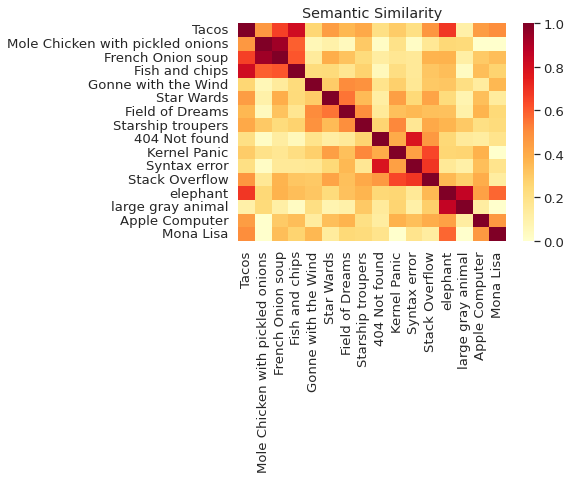

In [ ]:
run_and_plot(message, sim_func=np.inner)

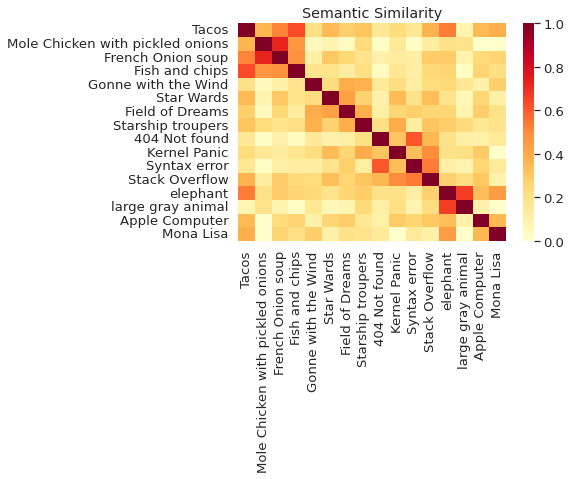

In [ ]:
run_and_plot(message, mult=25)

## Sentiment Analysis using BERT

In [ ]:
#antes de correr esto se debe de reiniciar runtime, restart runtime
!pip install -q -U "tensorflow-text==2.8.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.1/498.1 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 78.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 KB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 87.9 MB/s eta 0:00:00


In [ ]:
!pip install -q tf-models-official==2.7.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 KB 14.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
import tensorflow_text as text
import os
import shutil

In [ ]:
tf.get_logger().setLevel('ERROR')

In [ ]:
url = 'https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'
dataset = tf.keras.utils.get_file('aclImdb_v1.tar.gz',url,
                                  untar=True, cache_dir='.',
                                  cache_subdir='')
dataset_dir = os.path.join(os.path.dirname(dataset),'aclImdb')

84140032/84125825 [==============================] - 5s 0us/step


In [ ]:
train_dir = os.path.join(dataset_dir,'train')
remove_dir = os.path.join(train_dir,'unsup')
shutil.rmtree(remove_dir)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
batch_size = 32
seed=42

raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train',
    batch_size = batch_size,
    validation_split = 0.2,
    subset = 'training',
    seed = seed)

class_names = raw_train_ds.class_names
train_ds = raw_train_ds.cache().prefetch(buffer_size=AUTOTUNE)

val_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train',
    batch_size = batch_size,
    validation_split = 0.2,
    subset = 'training',
    seed = seed)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

test_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/test',
    batch_size = batch_size)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.


In [ ]:
class_names

['neg', 'pos']

In [ ]:
le_encoder = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3"
le_preprocess="https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"

In [ ]:
# el parametro trainable sirve para decirle a la red
#si quiere congelar los pesos de la red pre-entrenada (transfer learning)
#true: puede modificar los pesos pre-entrenados
#false: NO puede modificar los pesos pre-entrenados

def buil_classifier_model():
  text_input = tf.keras.layers.Input(shape=(),dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(le_preprocess,name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(le_encoder, trainable=True, name='BERT_Encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1,activation = None, name='Classifier')(net)

  return tf.keras.Model(text_input,net)

#to improve this we can add mode layers between Dropout and BERT


In [ ]:
classifier_model = buil_classifier_model()

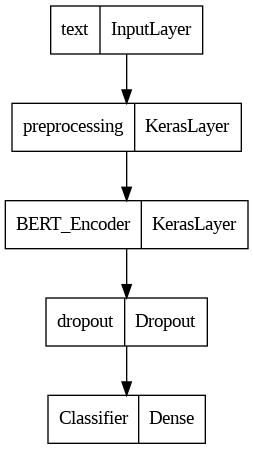

In [ ]:
tf.keras.utils.plot_model(classifier_model)

In [ ]:
classifier_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

In [ ]:
from official.nlp import optimization

/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.4 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [ ]:
epochs = 5
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(
    init_lr = init_lr,
    num_train_steps = num_train_steps,
    num_warmup_steps = num_warmup_steps,
    optimizer_type = 'adamw')


In [ ]:
steps_per_epoch

625

In [ ]:
classifier_model.compile(optimizer=optimizer, loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                         metrics=tf.metrics.BinaryAccuracy())

In [ ]:
history = classifier_model.fit(x=train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/5
625/625 [==============================] - 833s 1s/step - loss: 0.0286 - binary_accuracy: 0.9929 - val_loss: 0.0166 - val_binary_accuracy: 0.9967
Epoch 2/5
625/625 [==============================] - 831s 1s/step - loss: 0.0284 - binary_accuracy: 0.9928 - val_loss: 0.0166 - val_binary_accuracy: 0.9967
Epoch 3/5
625/625 [==============================] - 828s 1s/step - loss: 0.0271 - binary_accuracy: 0.9929 - val_loss: 0.0166 - val_binary_accuracy: 0.9967
Epoch 4/5
625/625 [==============================] - 823s 1s/step - loss: 0.0274 - binary_accuracy: 0.9933 - val_loss: 0.0166 - val_binary_accuracy: 0.9967
Epoch 5/5
625/625 [==============================] - 820s 1s/step - loss: 0.0284 - binary_accuracy: 0.9927 - val_loss: 0.0166 - val_binary_accuracy: 0.9967


### Model Serialization

In [ ]:
dataset_name = 'imdb/2/45'
#poner una direcion de drive
#saved_model_path = 'drivedirr/{}_bert'.format(dataset_name.replace('/','_'))
saved_model_path = '/content/drive/MyDrive/Colab Notebooks/EIT_W5/Models/{}_bert'.format(dataset_name.replace('/','_'))
print(saved_model_path)

#save the trained model
classifier_model.save(saved_model_path, include_optimizer=False)

/content/drive/MyDrive/Colab Notebooks/EIT_W5/Models/imdb_2_45_bert


In [ ]:
reloaded_model = tf.saved_model.load("/content/drive/MyDrive/Colab Notebooks/EIT_W5/Models/imdb_2_45_bert")

In [ ]:
example = ["this movie was bad, it was the worse. I hated it"]
example2 = ["It was ok. not super impressed. It could be worse though"]
example3 = ["meh"]
example4 = ["this was awesome! loved it. the director is the best"]

In [ ]:
tf.sigmoid(reloaded_model(tf.constant(example4)))[0][0]

<tf.Tensor: shape=(), dtype=float32, numpy=0.99695444>

## K-Means Clustering

K-means work well with spherical data, but not with non spherical data

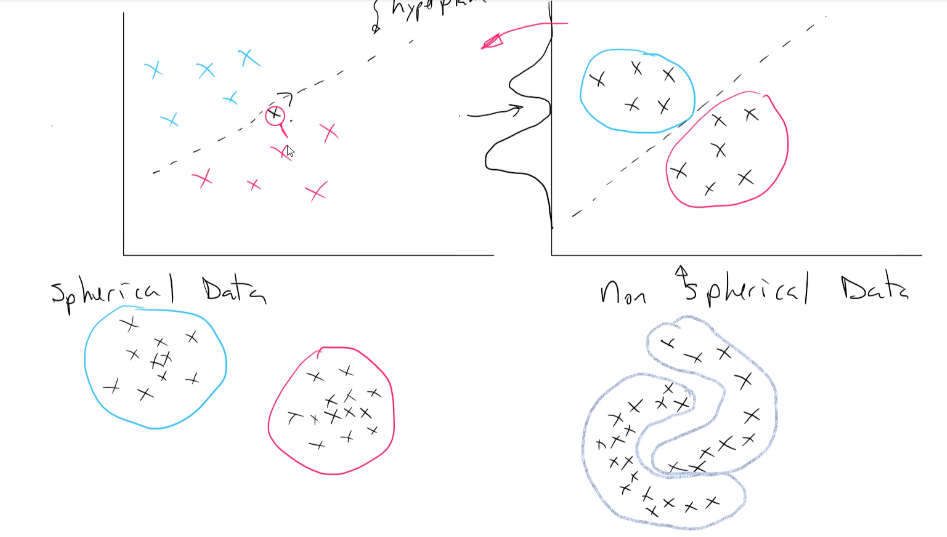

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
N= 3000
dims = 2
X = []
means = []
k = 3

for i in range(k):
  X.append(np.random.randn(N, dims)+np.random.randn(1, dims)*3.4)
  means.append(np.mean(X[-1], axis=0))

#print(X)
#vstack: combina todas los arreglos en uno solo
X = np.vstack(X)
#print(X)
means = np.vstack(means)
means.shape

(3, 2)

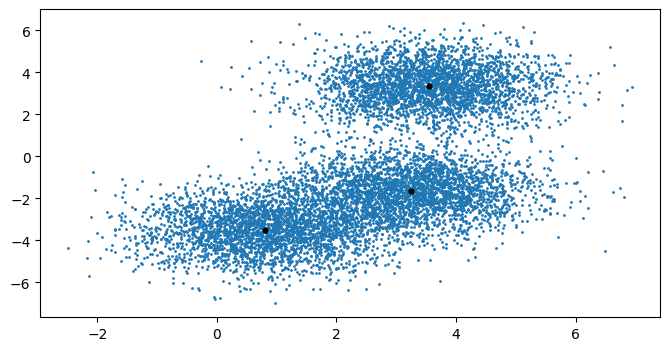

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(X[:,0],X[:,1],s=1)
plt.scatter(means[:,0],means[:,1],c='k',s=12)

In [ ]:
def Distance(x, means, *args, **kwargs):
  diff = []
  dists = []
  for mean in means:
    diff = x-mean
    dist = np.sqrt(np.sum(diff**2,axis=1,keepdims=True))
    dists.append(dist)
  return np.hstack(dists)

In [ ]:
dist = Distance(X, means)
#y_hat son las etiquetas generadas por el k means
y_hat = np.argmin(dist, axis=1)

In [ ]:
dist.shape

(9000, 3)

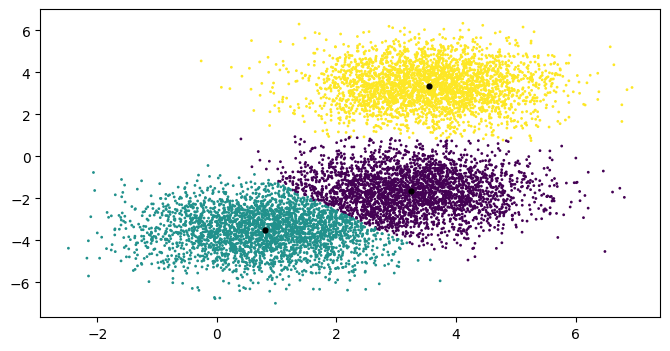

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(X[:,0],X[:,1],c=y_hat,s=1)
plt.scatter(means[:,0],means[:,1],c='k',s=12)

In [ ]:
means=[]

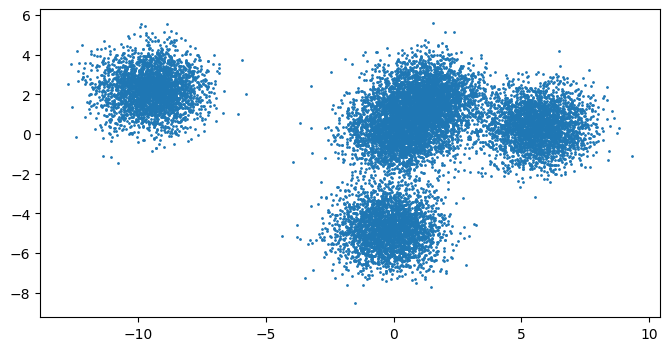

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(X[:,0],X[:,1],s=1)

In [ ]:
indices = np.array(X.shape[0])
sample_indices = np.random.choice(indices, size=k, replace=False)
means = X[sample_indices]

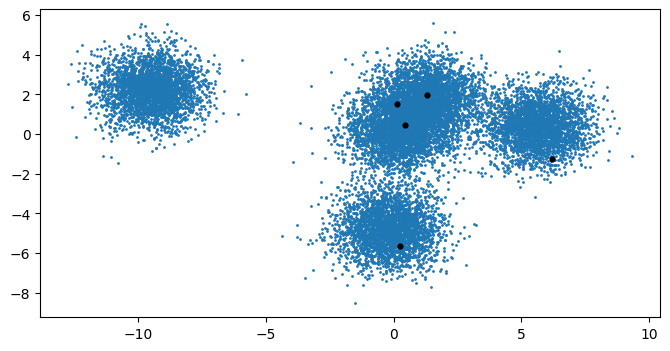

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(X[:,0],X[:,1],s=1)
plt.scatter(means[:,0],means[:,1],c='k',s=12)

In [ ]:
dist = Distance(X, means)
y_hat = np.argmin(dist,axis = 1)

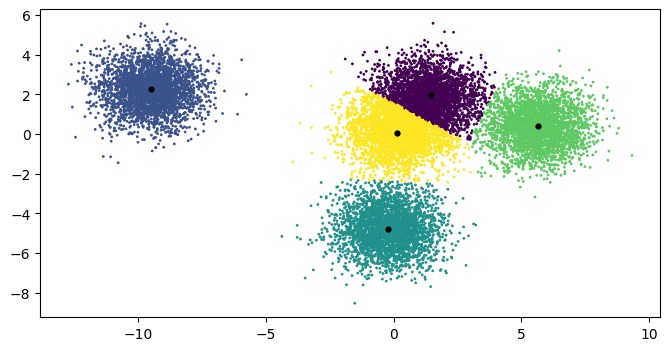

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(X[:,0],X[:,1],c=y_hat,s=1)
plt.scatter(means[:,0],means[:,1],c='k',s=12)

In [ ]:
means = []
for i in range(k):
  mean = np.mean(X[y_hat==i], axis=0)
  means.append(mean)
means = np.vstack(means)

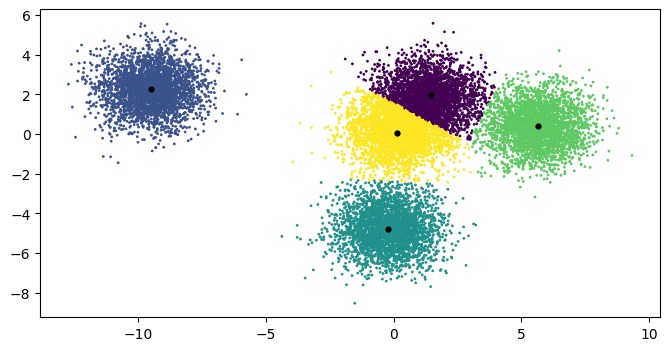

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(X[:,0],X[:,1],c=y_hat,s=1)
plt.scatter(means[:,0],means[:,1],c='k',s=12)

In [ ]:
def KMeans(X,k,iterations=3):
  indices = np.arange(X.shape[0])
  sample_indices = np.random.choice(indices, size=k, replace=False)
  means = X[sample_indices]

  for i in range(iterations):
    dist = Distance(X,means)
    y_hat = np.argmin(dist, axis=1)
    means = []

    for n in range(k):
      mean = np.mean(X[y_hat==n],axis=0)
      means.append(mean)

    means = np.vstack(means)

  dist = Distance(X, means)
  y_hat = np.argmin(dist,axis=1)
  return y_hat,means

In [ ]:
y_hat,means = KMeans(X,3,iterations=30)

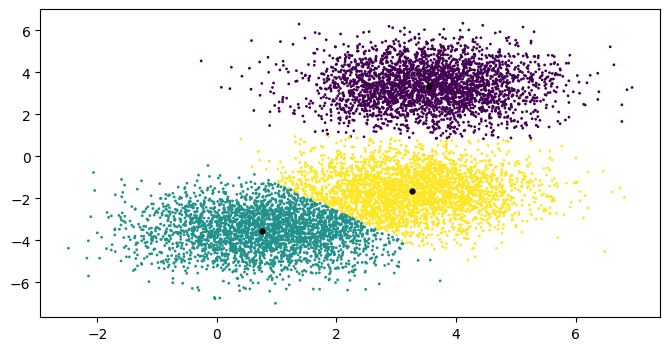

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(X[:,0],X[:,1],c=y_hat,s=1)
plt.scatter(means[:,0],means[:,1],c='k',s=12)

### Clustering in NLP

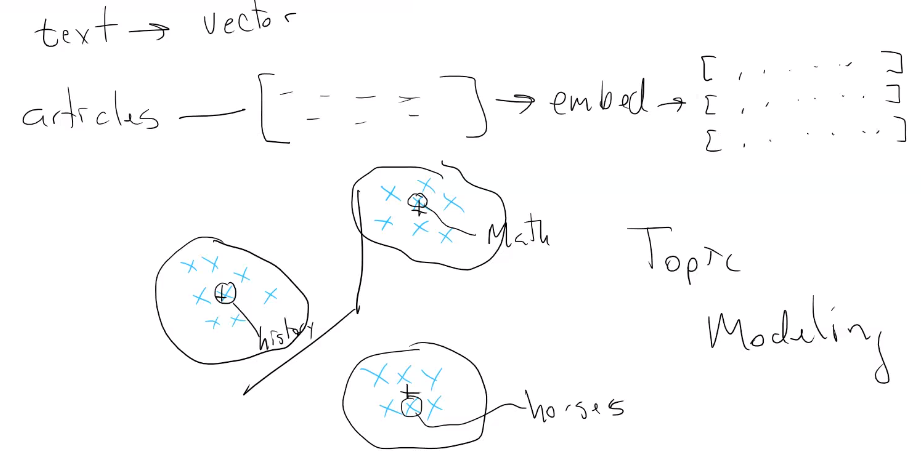

In [ ]:
class K_Means:
  def __init__(self, k, distance_func=Distance, beta=None):
    self.k=k
    self.distance_func=distance_func
    self.beta=beta

  def Fit(self,X,iterations=5):
    indices = np.arange(X.shape[0])
    sample_indices = np.random.choice(indices,size=self.k,replace=False)
    self.means = X[sample_indices]

    for i in range(iterations):
      y_hat = self.Predict(X)
      self.means=[]
      for j in range(self.k):
        mean=np.mean(X[y_hat==j], axis=0)
        self.means.append(mean)
      self.means=np.vstack(self.means)

    y_hat=self.Predict(X)
    plt.figure(figsize=(10,7))
    plt.scatter(X[:,0],X[:,1],s=1,c=y_hat)
    plt.scatter(self.means[:,0],self.means[:,1], c='k',s=10)

    return y_hat

  def Predict(self,X):
    dist=self.distance_func(X,self.means,self.beta)
    y_hat = np.argmin(dist,axis=1)
    return y_hat

## Unsupervised NLP

In [ ]:
import numpy as np
import numpy.linalg as lg
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import os
import re

import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
module_url="https://tfhub.dev/google/universal-sentence-encoder/4"
embedder=hub.load(module_url)

In [ ]:
def TextPreProcessing(sentence):

  clean_sentence = re.sub(r'https?:\/\/.*[\r\n]*','', sentence)

  return clean_sentence

In [ ]:
def data_load(filename):
  data = pd.read_csv(filename, header=0, encoding='iso-8859-1')
  X=data.Tweet
  return X

In [ ]:
X = data_load('/content/drive/MyDrive/Colab Notebooks/EIT_W5/data_elonmusk2.csv')
X

0       @MeltingIce Assuming max acceleration of 2 to ...
1       RT @SpaceX: BFR is capable of transporting sat...
2                                          @bigajm Yup :)
3                          Part 2 https://t.co/8Fvu57muhM
4       Fly to most places on Earth in under 30 mins a...
                              ...                        
3213    @YOUSRC Amos's article was fair, but his edito...
3214    These articles in Space News describe why Aria...
3215    Was misquoted by BBC as saying Europe's rocket...
3216    Just returned from a trip to London and Oxford...
3217    RT @Jon_Favreau: My Model S just arrived and I...
Name: Tweet, Length: 3218, dtype: object

In [ ]:
def embed(sentence):
  sentence_in=[sentence]
  return embedder(sentence_in)

In [ ]:
def LoadVectors(X):
  Dict_of_Sentences = dict()
  for i in range(len(X)):
    Dict_of_Sentences[i]= {"Sentence":X[i], "vector": embed(TextPreProcessing(X[i]))}
  return Dict_of_Sentences

In [ ]:
My_NLP_dict = LoadVectors(X)

In [ ]:
#to view the embeddings for each tweet
#My_NLP_dict[0]

In [ ]:
vector_tweets=[]
for i in range(len(X)):
  vector_tweets.append(np.hstack(My_NLP_dict[i]["vector"].numpy()))
vector_tweets = np.vstack(vector_tweets)

In [ ]:
vector_tweets.shape

(3218, 512)

In [ ]:
def Responsibility(X,means,beta=1e-3,*args,**kwargs):
  diff=[]
  responsibilities=[]

  for mean in means:
    diff =X -mean
    dist =(np.sum(diff ** 2,axis=1,keepdims=True))

    numerator= np.exp(-(beta*dist))
    denominator=np.sum(numerator)
    responsibility=-numerator/denominator

    responsibilities.append(responsibility)
  return np.hstack(responsibilities)

In [ ]:
k = 10
tweetcluster = K_Means(k, distance_func = Responsibility, beta = 3)

array([8, 2, 5, ..., 8, 3, 6])

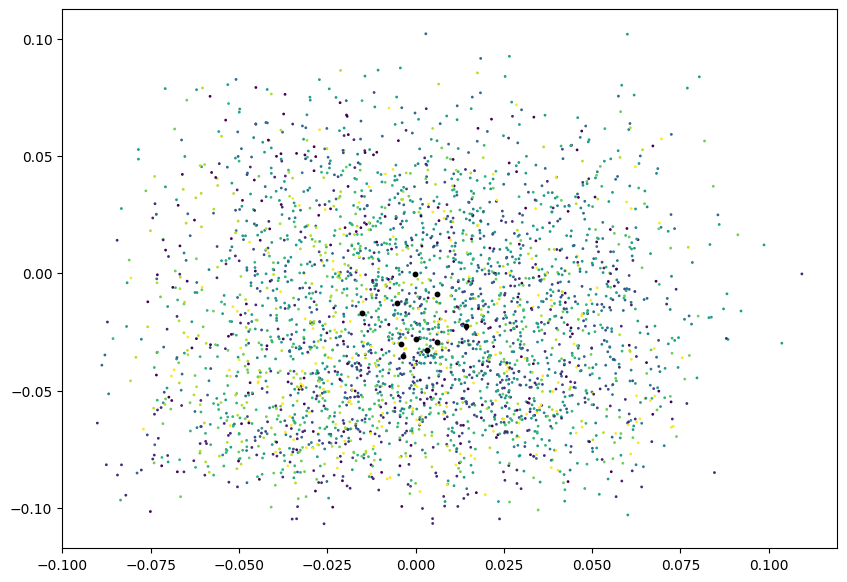

In [ ]:
tweetcluster.Fit(vector_tweets,iterations=30)

In [ ]:
y_hat = tweetcluster.Predict(vector_tweets)

In [ ]:
for i in range(len(X)):
  My_NLP_dict[i]['cluster'] = y_hat[i]

In [ ]:
Clusters_DF = pd.DataFrame.from_dict(My_NLP_dict,orient='index')

In [ ]:
Clusters_DF

,Sentence,vector,cluster
0,@MeltingIce Assuming max acceleration of 2 to ...,"((tf.Tensor(-0.009658784, shape=(), dtype=floa...",8
1,RT @SpaceX: BFR is capable of transporting sat...,"((tf.Tensor(0.017340142, shape=(), dtype=float...",2
2,@bigajm Yup :),"((tf.Tensor(0.042005133, shape=(), dtype=float...",5
3,Part 2 https://t.co/8Fvu57muhM,"((tf.Tensor(-0.030215798, shape=(), dtype=floa...",3
4,Fly to most places on Earth in under 30 mins a...,"((tf.Tensor(-0.07037318, shape=(), dtype=float...",1
...,...,...,...
3213,"@YOUSRC Amos's article was fair, but his edito...","((tf.Tensor(0.034133043, shape=(), dtype=float...",3
3214,These articles in Space News describe why Aria...,"((tf.Tensor(0.017698735, shape=(), dtype=float...",9
3215,Was misquoted by BBC as saying Europe's rocket...,"((tf.Tensor(-0.03936959, shape=(), dtype=float...",8
3216,Just returned from a trip to London and Oxford...,"((tf.Tensor(0.015134992, shape=(), dtype=float...",3


In [ ]:
lengths = []
for i in range(k):
  #print(lengths)
  lengths.append(len(Clusters_DF[Clusters_DF['cluster']==i]))
print(lengths)

[215, 325, 333, 282, 236, 649, 449, 256, 274, 199]


In [ ]:
Clusters_DF[Clusters_DF['cluster']==6].drop(['vector'], axis=1)

,Sentence,cluster
28,@Bobby_Gupta Def not ok. Just sent a reminder ...,6
30,@JayCruicks_ATC What if we just made a mini ve...,6
36,Tesla Semi truck unveil & test ride tentativel...,6
45,RT @TeslaMotors: Our new Supercharger route in...,6
60,RT @karpathy: We're hiring strong ML/CV/Roboti...,6
...,...,...
3188,Tesla was just approved for a full Class 1 Mas...,6
3190,Congrats to @dmetcalf for being the first to d...,6
3193,Am happy to report that Tesla was narrowly cas...,6
3212,Mass. judge denies auto dealers' demand to kil...,6


### Steps for NLP

